In [1]:
import os
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns  ###
import cartopy.crs as ccrs
sns.set(style='darkgrid') ### seaborn gives a nice design

In [2]:
cd /home/max/OneDrive/PHD-Flexibility/08_2_SecondPaper/unintended-storage-cycling/Model_scripts/scripts

/home/max/OneDrive/PHD-Flexibility/08_2_SecondPaper/unintended-storage-cycling/Model_scripts/scripts


In [3]:
from _helpers import *
from make_summary import assign_carriers
from plot_summary import plot_costs

## Upload network dataframes

In [4]:
os.getcwd()

'/home/max/OneDrive/PHD-Flexibility/08_2_SecondPaper/unintended-storage-cycling/Model_scripts/scripts'

In [5]:
cd /home/max/OneDrive/PHD-Flexibility/08_2_SecondPaper/unintended-storage-cycling

/home/max/OneDrive/PHD-Flexibility/08_2_SecondPaper/unintended-storage-cycling


In [6]:
#ls

In [7]:
# df = pd.read_csv('scenario_base.csv')
# df1 = pd.read_csv('scenario_accuracy1.csv')
# df2 = pd.read_csv('scenario_accuracy2.csv')
# df3 = pd.read_csv('scenario_accuracy3.csv')

df = pd.read_csv('scenario_base1.csv')
df1 = pd.read_csv('scenario_accuracy11.csv')
df2 = pd.read_csv('scenario_accuracy21.csv')
df3 = pd.read_csv('scenario_accuracy31.csv')

In [8]:
#df1

In [9]:
#Clean mistakes
# dff = df.drop_duplicates()
# dff.shape
# dff
# df.shape

In [10]:
## To rearrange columns
cols = list(df.columns.values)
cols

['scenario',
 'MC charger',
 'usc_count_charge',
 'usc_count_idle',
 'usc_count_discharge',
 'usc_count_total',
 'MC discharger',
 'MC store',
 'MC renewables',
 'scenario.1']

In [11]:
final_df = pd.concat([ df,   #base
                       df1,  #acc1
                       #df2, 
                       df3])  ##acc2

final_df = final_df[['scenario',
 'scenario.1',
 'MC charger',
 'MC store',
 'MC discharger',
 'MC renewables',
 'usc_count_total',
 'usc_count_charge',
 'usc_count_idle',
 'usc_count_discharge']]

final_df = final_df.set_index('scenario')

In [12]:
final_df.head(50)

,scenario.1,MC charger,MC store,MC discharger,MC renewables,usc_count_total,usc_count_charge,usc_count_idle,usc_count_discharge
scenario,,,,,,,,,
0.00000,base1,1612.705314,1614.058698,1602.339117,1612.705314,5181.0625,3824.2500,0.0,1356.8125
0.00001,base1,1618.767661,1617.764445,1621.219884,1611.492710,5181.2500,3806.9375,0.0,1374.3125
0.00010,base1,1617.135107,1577.868790,1591.244698,1589.831718,5181.1250,3783.0625,0.0,1398.0625
0.00100,base1,1517.259118,1454.551300,1547.265750,1540.950018,5181.0625,3840.2500,0.0,1340.8125
0.01000,base1,1393.643822,1349.755759,1424.127682,1397.137191,5181.1875,3758.2500,0.0,1422.9375
0.10000,base1,1293.094831,1279.422150,1302.656511,1320.031827,5181.0625,3483.5625,0.0,1697.5000
1.00000,base1,1264.079364,1261.320267,1267.358764,1266.750948,0.0000,0.0000,0.0,0.0000
10.00000,base1,1244.892851,1229.370124,1248.669074,1253.924310,0.0000,0.0000,0.0,0.0000
100.00000,base1,1107.296394,912.193468,1136.791187,1171.175330,0.0000,0.0000,0.0,0.0000


In [13]:
final_df.iloc[40:50,1:5]

,MC charger,MC store,MC discharger,MC renewables
scenario,,,,
0.00000,1585.249420,1609.219710,1604.205228,1604.205228
0.00001,1571.805970,1584.786139,1580.947240,1597.623759
0.00010,1512.557830,1470.506803,1491.248314,1517.955038
0.00100,1364.408033,1360.962208,1341.420917,1391.571468
0.01000,1307.281298,1290.667203,1295.854943,1302.430058
0.10000,1280.559658,1278.736695,1282.392687,1284.172983
1.00000,1273.082188,1270.582266,1273.855255,1275.058549
10.00000,1253.199816,1239.122105,1256.710218,1262.441094
100.00000,1112.442302,917.489666,1142.293939,1177.182692


In [14]:
#### Filter
#Check only in solver accuracy scenario "base/medium" 
#With marginal cost scenarios of 0.0001
#The average discharger FLH of the four MC addition cases
scenario = 0.1
x = final_df.loc[(final_df['scenario.1'] == 'base1')].loc[scenario]
#print(x.iloc[0,1:5].mean(axis = 0)) # yaxis, takes the average of the for scenarios
#print(scenario)

#annotation coordinates low resolution
accuracy = 'accuracy31'
scenario = 10
y1 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x1 = scenario
scenario = 1
y2 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x2 = scenario
scenario = 0.1
y3 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x3 = scenario
scenario = 0.01
y4 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x4 = scenario


#annotation coordinates medium resolution
accuracy = 'base1'
scenario = 10
y5 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x5 = scenario
scenario = 1
y6 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x6 = scenario
scenario = 0.1
y7 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x7 = scenario
scenario = 0.01
y8 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x8 = scenario

#annotation coordinates high resolution
accuracy = 'accuracy1'
scenario = 10
y9 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x9 = scenario
scenario = 1
y10 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x10 = scenario
scenario = 0.1
y11 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x11 = scenario
scenario = 0.01
y12 = final_df.loc[(final_df['scenario.1'] == accuracy)].loc[scenario].iloc[0,1:5].mean(axis = 0)
x12 = scenario

print("x1 =", x1)
print("y1 =", y1)
print("x2 =", x2)
print("y2 =", y2)
print("x3 =", x3)
print("y3 =", y3)
print("x4 =", x4)
print("y4 =", y4)
print("x5 =", x5)
print("y5 =", y5)
print("x6 =", x6)
print("y6 =", y6)

x1 = 10
y1 = 1262.6699949674553
x2 = 1
y2 = 1302.0840426892414
x3 = 0.1
y3 = 1421.6772520583404
x4 = 0.01
y4 = 1540.3416891643988
x5 = 10
y5 = 1244.214089777391
x6 = 1
y6 = 1264.8773357593727


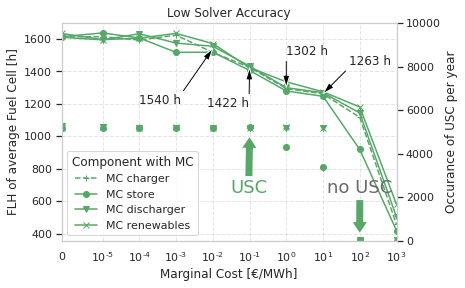

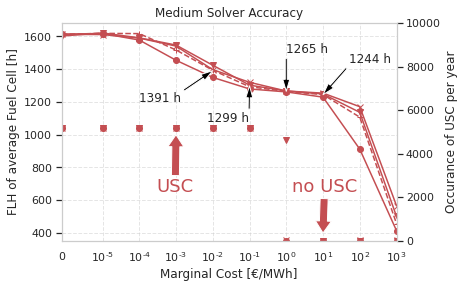

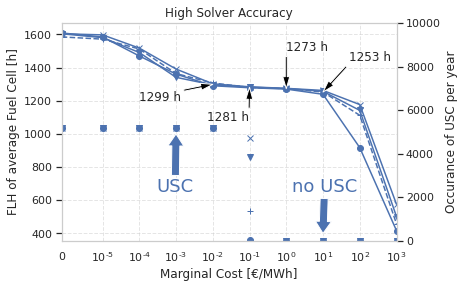

In [15]:
#adding to mc_charger = n10-n19
#adding to mc_dicharger = n20-n29
#adding to mc_store = n30-n39
#adding to mc_vre = n40-n49

##From accurate to less accurate##
#scenario accuracy1
#scenario base
#scenario accuracy2

sns.set_style("whitegrid")

#### FLH
#### Low Solver Accuracy
lines = final_df.iloc[80:90,1:5].plot(style=["g--+",'go-',"gv-","gx-"]) #accuracy2
plt.ylabel("FLH of average Fuel Cell [h]") #(full usage/year)
ax = final_df.iloc[80:90,5].plot(style="g+", secondary_y=True, ax = lines)
final_df.iloc[90:100,5].plot(style="gv", secondary_y=True, ax = lines)
final_df.iloc[100:110,5].plot(style="go", secondary_y=True, ax = lines)
final_df.iloc[110:120,5].plot(style="gx", secondary_y=True, ax = lines)
plt.xscale("symlog",linthresh=1e-5)
plt.title("Low Solver Accuracy")
lines.spines['top'].set_visible(False)
lines.spines['right'].set_visible(False)
lines.spines['bottom'].set_visible(False)
lines.spines['left'].set_visible(False)
lines.legend(loc='lower left', frameon=True, title="Component with MC")
ax.set_ylim(0,10000)
ax.set_xlim(0,1000)
plt.ylabel("Occurance of USC per year")
lines.set_xlabel("Marginal Cost [€/MWh]")
# Annotations
lines.annotate(str(round(y1))+" h",(x1,y1), size=12, xytext=(50, 1440),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y2))+" h",(x2,y2), size=12, xytext=(1, 1500),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y3))+" h",(x3,y3), size=12, xytext=(0.007, 1180),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y4))+" h",(x4,y4), size=12, xytext=(0.0001, 1200),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate("USC", (0.1, 1000), size=18, color="g", xytext=(0.03, 650),arrowprops=dict(facecolor='g', shrink=0.0001, width=8, headwidth=16))
lines.annotate("no USC", (100, 400), size=18, color="dimgrey", xytext=(13, 650),arrowprops=dict(facecolor='g', shrink=0.0001, width=8, headwidth=16))
#lines.annotate("no USC", (13, 650), size=18, color="dimgrey")
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
lines.grid(linestyle='--', linewidth=1, alpha=0.5)
# Print
plt.savefig('low_accuracy_USC_operation.pdf', bbox_inches='tight')

#### Medium Solver Accuracy
lines = final_df.iloc[0:10,1:5].plot(style=["r--+",'ro-',"rv-","rx-"], legend=None) #base
plt.ylabel("FLH of average Fuel Cell [h]") #(full usage/year)
ax = final_df.iloc[0:10,5].plot(style="r+", secondary_y=True, ax = lines)
final_df.iloc[10:20,5].plot(style="rv", secondary_y=True, ax = lines)
final_df.iloc[20:30,5].plot(style="ro", secondary_y=True, ax = lines)
final_df.iloc[30:40,5].plot(style="rx", secondary_y=True, ax = lines)
plt.xscale("symlog",linthresh=1e-5)
plt.title("Medium Solver Accuracy")
lines.spines['top'].set_visible(False)
lines.spines['right'].set_visible(False)
lines.spines['bottom'].set_visible(False)
lines.spines['left'].set_visible(False)
#lines.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left', frameon=False, title="Component with MC")
ax.set_ylim(0,10000)
ax.set_xlim(0,1000)
plt.ylabel("Occurance of USC per year")
lines.set_xlabel("Marginal Cost [€/MWh]")
# Annotations
lines.annotate(str(round(y5))+" h",(x5,y5), size=12, xytext=(50, 1440),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y6))+" h",(x6,y6), size=12, xytext=(1, 1500),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y7))+" h",(x7,y7), size=12, xytext=(0.007, 1080),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y8))+" h",(x8,y8), size=12, xytext=(0.0001, 1200),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate("USC", (0.001, 1000), size=18, color="r", xytext=(0.0003, 650),arrowprops=dict(facecolor='r', shrink=0.0001, width=8, headwidth=16))
lines.annotate("no USC", (10, 400), size=18, color="r", xytext=(1.4, 650),arrowprops=dict(facecolor='r', shrink=0.0001, width=8, headwidth=16))

#lines.annotate("no USC", (3, 650), size=18, color="dimgrey")
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
lines.grid(linestyle='--', linewidth=1, alpha=0.5)
# Print
plt.savefig('medium_accuracy_USC_operation.pdf', bbox_inches='tight')

#### High Solver Accuracy
lines = final_df.iloc[40:50,1:5].plot(style=["b--+",'bo-',"bv-","bx-"], legend=None) #accuracy1
plt.ylabel("FLH of average Fuel Cell [h]") #(full usage/year)
ax = final_df.iloc[40:50,5].plot(style="b+", secondary_y=True, ax = lines)
final_df.iloc[50:60,5].plot(style="bv", secondary_y=True, ax = lines)
final_df.iloc[60:70,5].plot(style="bo", secondary_y=True, ax = lines)
final_df.iloc[70:80,5].plot(style="bx", secondary_y=True, ax = lines)
plt.xscale("symlog",linthresh=1e-5)
plt.title("High Solver Accuracy")
lines.spines['top'].set_visible(False)
lines.spines['right'].set_visible(False)
lines.spines['bottom'].set_visible(False)
lines.spines['left'].set_visible(False)
#lines.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left', frameon=False, title="Component with MC")
ax.set_ylim(0,10000)
ax.set_xlim(0,1000)
plt.ylabel("Occurance of USC per year")
lines.set_xlabel("Marginal Cost [€/MWh]")
# Annotations
lines.annotate(str(round(y9))+" h",(x9,y9), size=12, xytext=(50, 1440),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y10))+" h",(x10,y10), size=12, xytext=(1, 1500),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y11))+" h",(x11,y11), size=12, xytext=(0.007, 1080),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate(str(round(y12))+" h",(x12,y12), size=12, xytext=(0.0001, 1200),arrowprops=dict(facecolor='black', shrink=0.0001, width=2, headwidth=7))
lines.annotate("USC", (0.001, 1000), size=18, color="b", xytext=(0.0003, 650),arrowprops=dict(facecolor='b', shrink=0.0001, width=8, headwidth=16))
lines.annotate("no USC", (10, 400), size=18, color="b", xytext=(1.4, 650),arrowprops=dict(facecolor='b', shrink=0.0001, width=8, headwidth=16))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
lines.grid(linestyle='--', linewidth=1, alpha=0.5)

# Print
plt.savefig('high_accuracy_USC_operation.pdf', bbox_inches='tight')


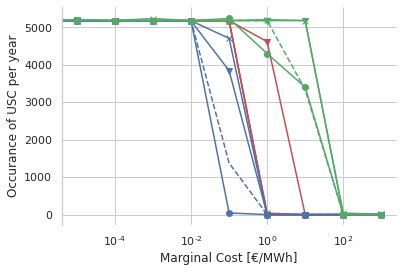

In [16]:
#adding to mc_charger = n10-n19
#adding to mc_dicharger = n20-n29
#adding to mc_store = n30-n39
#adding to mc_vre = n40-n49

#,'ro-',"rv-","rx-"


sns.set_style("whitegrid")

##Counter
ax = final_df.iloc[0:10,5].plot(style="r--") 
final_df.iloc[10:20,5].plot(style="rv-", ax=ax)
final_df.iloc[20:30,5].plot(style="ro-")
final_df.iloc[30:40,5].plot(style="rx-")
final_df.iloc[40:50,5].plot(style="b--") 
final_df.iloc[50:60,5].plot(style="bv-")
final_df.iloc[60:70,5].plot(style="bo-")
final_df.iloc[70:80,5].plot(style="bx-")
final_df.iloc[80:90,5].plot(style="g--") 
final_df.iloc[90:100,5].plot(style="gv-")
final_df.iloc[100:110,5].plot(style="go-")
final_df.iloc[110:120,5].plot(style="gx-")

plt.title("")
plt.xlabel("Marginal Cost [€/MWh]")
plt.ylabel("Occurance of USC per year") #(full usage/year)
plt.xscale("log")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
lines.spines['left'].set_visible(False)

In [17]:
final_df.iloc[0:10,5]

scenario
0.00000       5181.0625
0.00001       5181.2500
0.00010       5181.1250
0.00100       5181.0625
0.01000       5181.1875
0.10000       5181.0625
1.00000          0.0000
10.00000         0.0000
100.00000        0.0000
1000.00000       0.0000
Name: usc_count_total, dtype: float64